In [1]:
path = '/Users/schama/Desktop/Mirror/00FSU/00CoursesSpring2023/ProjectsDataSci/Assignment2/NYC_Jobs.csv'

In [15]:
import pandas as pd
# to show all columns and lines 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import numpy as np

In [3]:
jobs = pd.read_csv(path, index_col = 'Job ID')

In [4]:
# Encoding variable Posting Type
jobs['Posting Type'].replace(['Internal', 'External'], [0,1], inplace = True)
jobs['Posting Type'].unique()

array([0, 1])

In [5]:
# Dealing with null values and keeping only Full time jobs in variable Full-Time/Part-Time indicator
jobs['Full-Time/Part-Time indicator'].unique()
jobs['Full-Time/Part-Time indicator'].fillna('F', inplace = True)
# dropping only part time
jobs.drop(jobs[jobs['Full-Time/Part-Time indicator'] == 'P'].index, inplace = True)


In [6]:
# Dropping columns we are not interested in
jobs.drop(['Business Title',
           'Civil Service Title',
           'Title Classification',
           'Title Code No',
           'Work Location',
           'Division/Work Unit',
           'Job Description',
           'Preferred Skills',
           'Additional Information',
           'To Apply',
           'Hours/Shift',
           'Work Location 1',
           'Recruitment Contact',
           'Residency Requirement',
           'Post Until',
           'Process Date',
           'Full-Time/Part-Time indicator'], axis=1, inplace=True)

In [7]:
# Encoding variabel Level. Since accompanying information (.xlsx file) said only 4 categories exist encoding with only 4
jobs.Level.replace(['01', '03', '00', '02', '04', '4A', 'M3', 'M6', 'M4', 'M2', 'M1',
       'M5', 'M7', 'M8', '2A', '4B', '1A', 'MY'], [1,3,0,2,4,4,3,6,4,2,1,5,7,8,2,4,1,0], inplace = True)
jobs.groupby(['Level']).size()
jobs.loc[jobs["Level"] > 4, "Level"] = 4
jobs.Level.unique()

array([1, 3, 0, 2, 4])

In [1]:
jobs.groupby(['Level']).size()

NameError: name 'jobs' is not defined

In [8]:
# Encoding Career Level and dealing with missing values (input to the largest category)
jobs['Career Level'].replace(['Student','Entry-Level','Experienced (non-manager)','Manager','Executive'], [1,2,3,4,5], inplace = True)
jobs.groupby(['Career Level']).size()
# filling missing value with the most represented category
jobs['Career Level'].fillna(3, inplace = True)
jobs['Career Level'].unique()

array([2., 3., 4., 5., 1.])

In [9]:
# Dealing with the Salary variable that had different values related to Salary Frquency
# making a copy of the column to modify
jobs['Salary'] = jobs.loc[:, 'Salary Range To']
# hourly is going to be 35 (most jobs on the data set were 35/week) hours per week * 52 weeks in one year = 1820
jobs.loc[jobs['Salary Frequency'] == 'Hourly', 'Salary'] *= 1820
# Daily is going to be 5 * 52 = 260
jobs.loc[jobs['Salary Frequency'] == 'Daily', 'Salary'] *= 260

In [10]:
# Encoding Salary frequency
jobs['Salary Frequency'].replace(['Annual', 'Hourly', 'Daily'], [3,2,1], inplace = True)
jobs['Salary Frequency'].unique()

array([3, 2, 1])

In [11]:
# Dealing with Dates, making dataetime objects and getting the number of days between dates
jobs['date1'] = pd.to_datetime(jobs['Posting Date'])
jobs['date2'] = pd.to_datetime(jobs['Posting Updated'])
jobs['last modified'] = (jobs['date2'] - jobs['date1']).dt.days
jobs['last modified'].mask(jobs['last modified'] < 0, 0, inplace = True)
jobs['last modified'].describe()

count    5387.000000
mean       28.403007
std        74.759379
min         0.000000
25%         0.000000
50%         0.000000
75%        24.000000
max      1462.000000
Name: last modified, dtype: float64

In [12]:
# Encoding date as Month, Day, Year Columns (will drop Day at the end)
jobs[['Month', 'Day', 'Year']] = jobs['Posting Date'].str.split('/', expand = True)
# converting year to integer
jobs['Year'] = jobs['Year'].astype('int')

In [16]:
#jobs['Minimum Qual Requirements'].value_counts()

In [17]:
# Encoding Minimum Qual Requirements - masters 1 and no masters 0
jobs['qual'] = np.where(jobs['Minimum Qual Requirements'].str.contains(r"master's|master"), 1, 0)
jobs['qual'].unique()

array([0, 1])

In [18]:
jobs.head()

,Agency,Posting Type,# Of Positions,Level,Job Category,Career Level,Salary Range From,Salary Range To,Salary Frequency,Minimum Qual Requirements,Posting Date,Posting Updated,Salary,date1,date2,last modified,Month,Day,Year,qual
Job ID,,,,,,,,,,,,,,,,,,,,
554053,OFFICE OF MANAGEMENT & BUDGET,0,2,1,"Finance, Accounting, & Procurement Policy, Res...",2.0,51550.0,73806.0,3,1. A baccalaureate degree from an accredited c...,10/04/2022,10/04/2022,73806.0,2022-10-04,2022-10-04,0,10,04,2022,0
546697,OFF OF PAYROLL ADMINISTRATION,1,1,1,"Technology, Data & Innovation Policy, Research...",3.0,51345.0,65000.0,3,1. A baccalaureate degree from an accredited c...,08/18/2022,08/18/2022,65000.0,2022-08-18,2022-08-18,0,08,18,2022,0
565942,DEPARTMENT OF TRANSPORTATION,0,1,3,"Administration & Human Resources Policy, Resea...",3.0,74650.0,109409.0,3,1. A master's degree in transportation enginee...,12/28/2022,12/28/2022,109409.0,2022-12-28,2022-12-28,0,12,28,2022,1
556917,DEPT OF ENVIRONMENT PROTECTION,1,1,0,"Finance, Accounting, & Procurement",3.0,65232.0,151810.0,3,1. A baccalaureate degree from an accredited c...,10/25/2022,10/26/2022,151810.0,2022-10-25,2022-10-26,1,10,25,2022,0
531091,LAW DEPARTMENT,1,1,0,Legal Affairs,3.0,73579.0,122643.0,3,Because our mission is to provide outstanding ...,05/05/2022,06/28/2022,122643.0,2022-05-05,2022-06-28,54,05,05,2022,0


In [19]:
# Encoding Angency - might not use so will not deal with number of categories right now
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
jobs['Agency'] = labelencoder.fit_transform(jobs['Agency'])
jobs['Agency'].value_counts()

24    770
35    509
25    495
45    361
21    339
16    306
0     194
26    186
38    177
34    175
23    161
32    137
52    136
53    109
5     106
29    106
33    102
28     97
10     90
50     86
56     85
15     68
22     56
14     52
36     46
48     40
13     38
1      36
17     28
31     28
44     26
18     26
58     24
12     22
20     20
47     18
19     17
7      14
57     14
9      13
42     12
46      9
54      6
49      6
30      6
11      4
43      4
3       4
55      3
27      2
51      2
41      2
37      2
8       2
6       2
2       2
4       2
40      2
39      2
Name: Agency, dtype: int64

In [20]:
jobs.head()

,Agency,Posting Type,# Of Positions,Level,Job Category,Career Level,Salary Range From,Salary Range To,Salary Frequency,Minimum Qual Requirements,Posting Date,Posting Updated,Salary,date1,date2,last modified,Month,Day,Year,qual
Job ID,,,,,,,,,,,,,,,,,,,,
554053,50,0,2,1,"Finance, Accounting, & Procurement Policy, Res...",2.0,51550.0,73806.0,3,1. A baccalaureate degree from an accredited c...,10/04/2022,10/04/2022,73806.0,2022-10-04,2022-10-04,0,10,04,2022,0
546697,47,1,1,1,"Technology, Data & Innovation Policy, Research...",3.0,51345.0,65000.0,3,1. A baccalaureate degree from an accredited c...,08/18/2022,08/18/2022,65000.0,2022-08-18,2022-08-18,0,08,18,2022,0
565942,21,0,1,3,"Administration & Human Resources Policy, Resea...",3.0,74650.0,109409.0,3,1. A master's degree in transportation enginee...,12/28/2022,12/28/2022,109409.0,2022-12-28,2022-12-28,0,12,28,2022,1
556917,24,1,1,0,"Finance, Accounting, & Procurement",3.0,65232.0,151810.0,3,1. A baccalaureate degree from an accredited c...,10/25/2022,10/26/2022,151810.0,2022-10-25,2022-10-26,1,10,25,2022,0
531091,38,1,1,0,Legal Affairs,3.0,73579.0,122643.0,3,Because our mission is to provide outstanding ...,05/05/2022,06/28/2022,122643.0,2022-05-05,2022-06-28,54,05,05,2022,0


Job Category - tech and non tech - find words technology, data, innovation, analysis, research for tech

In [22]:
#jobs['Job Category'].value_counts()

In [23]:
# Encoding Job Category - where contains value 1 (tech) and not value 0 (non-tech)
#terms = ['Technology', 'Research', 'Data', 'Analysis' , 'Innovation', 'Research']
#df4[df4['col'].str.contains('|'.join(terms))] - to test I used pd.Series() so I could print
jobs['category'] = np.where(jobs['Job Category'].str.contains(r'Technology|Research|Data|Analysis|Innovation|Research'), 1, 0)
jobs['category'].unique()

array([1, 0])


Agency would benefit from getting the number of categories smaller!

In [24]:
# Dropping final columns that were not of interest anymore
jobs.drop(['Minimum Qual Requirements','Salary Range From',
           'Salary Range To','Month', 'Day','Posting Date',
          'Posting Updated','date2','Job Category'], axis=1, inplace=True)

In [25]:
# Checking types to be sure all are numeric or datetime
jobs.dtypes

Agency                       int64
Posting Type                 int64
# Of Positions               int64
Level                        int64
Career Level               float64
Salary Frequency             int64
Salary                     float64
date1               datetime64[ns]
last modified                int64
Year                         int64
qual                         int64
category                     int64
dtype: object

In [26]:
# Taking a final look at the data
jobs.describe()

,Agency,Posting Type,# Of Positions,Level,Career Level,Salary Frequency,Salary,last modified,Year,qual,category
count,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000,5387.000000
mean,28.201782,0.463338,2.132170,1.302209,3.034528,2.948580,92023.629211,28.403007,2021.956191,0.229256,0.243549
std,12.974264,0.498700,7.241753,1.318975,0.542234,0.263075,37637.871404,74.759379,0.848500,0.420393,0.429264
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,28119.000000,0.000000,2011.000000,0.000000,0.000000
25%,21.000000,0.000000,1.000000,0.000000,3.000000,3.000000,64177.000000,0.000000,2022.000000,0.000000,0.000000
50%,25.000000,0.000000,1.000000,1.000000,3.000000,3.000000,83981.000000,0.000000,2022.000000,0.000000,0.000000
75%,35.000000,1.000000,1.000000,2.000000,3.000000,3.000000,110000.000000,24.000000,2022.000000,0.000000,0.000000
max,58.000000,1.000000,200.000000,4.000000,5.000000,3.000000,265000.000000,1462.000000,2023.000000,1.000000,1.000000


In [27]:
# Check missing again
missing_val_count_by_column = pd.DataFrame(data=jobs.isnull().sum(), columns=["Missing"])
missing_val_count_by_column["Percent"]= missing_val_count_by_column["Missing"] / jobs.shape[0] * 100

print("Mising values per column:")

df=missing_val_count_by_column.loc[(missing_val_count_by_column!=0).any(axis=1)]
display(df)

Mising values per column:


,Missing,Percent


In [28]:
list(jobs.columns)

['Agency',
 'Posting Type',
 '# Of Positions',
 'Level',
 'Career Level',
 'Salary Frequency',
 'Salary',
 'date1',
 'last modified',
 'Year',
 'qual',
 'category']

In [29]:
# Saving data to a .csv format for analysis
#jobs.to_csv('jobsProcessedFinalRe.csv', index=False)

In [30]:
data = jobs.copy()

In [31]:
import matplotlib.pyplot as plt
import datetime as dt
data['month']=None
data['month'] = pd.DatetimeIndex(data['date1']).month
 

<BarContainer object of 5387 artists>

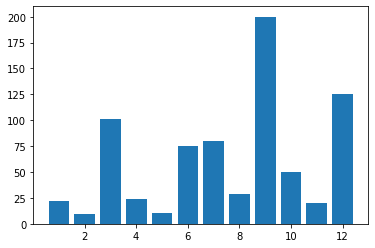

In [32]:
plt.bar(data['month'],data['# Of Positions'])


In [33]:
month_details_1={1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0} #dictionary of each month of tech jobs
month_details_0={1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}  #dictionary of each month of non tech jobs
for index, row in data.iterrows():
    #print(row["Name"], row["Age"])
    if(row['category']==1):
      month_details_1[row['month']]+=1
    else:
      month_details_0[row['month']]+=1

print(month_details_0)
print(month_details_1)


{1: 522, 2: 67, 3: 69, 4: 143, 5: 147, 6: 252, 7: 356, 8: 299, 9: 344, 10: 446, 11: 536, 12: 894}
{1: 99, 2: 19, 3: 31, 4: 37, 5: 44, 6: 61, 7: 92, 8: 180, 9: 110, 10: 178, 11: 200, 12: 261}


bar plot of no.of tech and non tech jobs according to indiviual months in 2022 in nyc

In [34]:
print(month_details_0.keys())
print(month_details_0.values())

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
dict_values([522, 67, 69, 143, 147, 252, 356, 299, 344, 446, 536, 894])


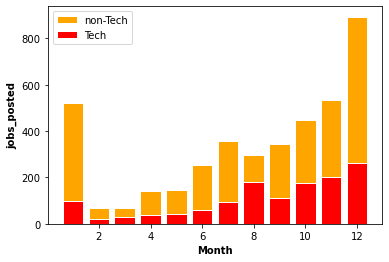

In [35]:
plt.bar(month_details_0.keys(),month_details_0.values(),color='orange', edgecolor='white', label='non-Tech')
plt.bar(month_details_1.keys(),month_details_1.values(),color='red', edgecolor='white', label='Tech')

#x=month_details_0.keys()
#y_tech=month_details_0.values()
#z_non_tech=month_details_1.values()

#plt.bar(x,y_tech,0.4,label='Tech')
#plt.bar(x,z_non_tech,0.4,label='Non-Tech')
plt.xlabel('Month', fontweight='bold')
plt.ylabel('jobs_posted',fontweight='bold')
plt.legend()
plt.show()

The above plot indicates no.of jobs posted in particular months of 2022

Below I am trying to plot no.of total positions in particular field posted in particular months

In [36]:
month_details_1_totalpos={1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0} #dictionary of each month of tech jobs
month_details_0_totalpos={1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}  #dictionary of each month of non tech jobs
for index, row in data.iterrows():
    #print(row["Name"], row["Age"])
    if(row['category']==1):
      month_details_1_totalpos[row['month']]=month_details_1_totalpos[row['month']]+row['# Of Positions']
    else:
      month_details_0_totalpos[row['month']]=month_details_0_totalpos[row['month']]+row['# Of Positions']

print("non-tech ",month_details_0_totalpos)
print("tech ",month_details_1_totalpos)


non-tech  {1: 819, 2: 137, 3: 357, 4: 349, 5: 287, 6: 799, 7: 1305, 8: 603, 9: 1643, 10: 834, 11: 919, 12: 1639}
tech  {1: 105, 2: 25, 3: 39, 4: 39, 5: 70, 6: 79, 7: 154, 8: 258, 9: 173, 10: 206, 11: 288, 12: 359}


In [37]:
print(sum(data['# Of Positions']))

11486


In [38]:
print("total nontech jobs ",sum(month_details_0_totalpos.values()))
print("total tech jobs ",sum(month_details_1_totalpos.values()))

total nontech jobs  9691
total tech jobs  1795


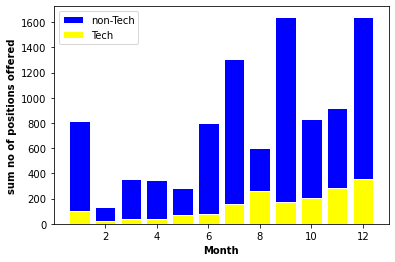

In [39]:
plt.bar(month_details_0_totalpos.keys(),month_details_0_totalpos.values(),color='blue', edgecolor='white', label='non-Tech')
plt.bar(month_details_1_totalpos.keys(),month_details_1_totalpos.values(),color='yellow', edgecolor='white', label='Tech')

plt.xlabel('Month', fontweight='bold')
plt.ylabel('sum no of positions offered',fontweight='bold')
plt.legend()
plt.show()

so the most no. of positions offered are in months of december and september

Trying to plot the different salaray ranges of tech and non tech jobs in nyc

In [40]:
data['Salary'].describe()

count      5387.000000
mean      92023.629211
std       37637.871404
min       28119.000000
25%       64177.000000
50%       83981.000000
75%      110000.000000
max      265000.000000
Name: Salary, dtype: float64

In [41]:
data['category'].value_counts()

0    4075
1    1312
Name: category, dtype: int64

In [42]:
avg_tech_salary=0
avg_nontech_salary=0
for index, row in data.iterrows():
  if(row['category']==1):
    avg_tech_salary+=row['Salary']
  else:
    avg_nontech_salary+=row['Salary']

avg_tech_salary=avg_tech_salary/1312
avg_nontech_salary=avg_nontech_salary/4075

#print(avg_tech_salary)
#print(avg_nontech_salary)

Avg_Salary=pd.DataFrame({'Tech_avg_salary':[avg_tech_salary],'Non-Tech_avg_salary':[avg_nontech_salary]})

Avg_Salary

,Tech_avg_salary,Non-Tech_avg_salary
0,103804.290701,88230.689856


In [43]:
salary_count={1:0,2:0,3:0,4:0,5:0,6:0,7:0}

for index, row in data.iterrows():
  if(row['Salary']<30000):
    salary_count[1]+=1
  elif(row['Salary']<50000 and row['Salary']>=30000):
    salary_count[2]+=1
  elif(row['Salary']<80000 and row['Salary']>=50000):
    salary_count[3]+=1
  elif(row['Salary']<100000 and row['Salary']>=80000):
    salary_count[4]+=1
  elif(row['Salary']<100000 and row['Salary']>=120000):
    salary_count[5]+=1
  elif(row['Salary']<200000 and row['Salary']>=120000):
    salary_count[6]+=1
  else:
      salary_count[7]+=1

In [44]:
salary_count

{1: 16, 2: 447, 3: 1822, 4: 1324, 5: 0, 6: 934, 7: 844}

([<matplotlib.patches.Wedge at 0x7fefe8c6fcd0>,
 [Text(1.0999521143613857, 0.010263825403680309, '<30k'),
  Text(1.0573603536330334, 0.30329702036951633, '30k-50k'),
  Text(-0.03495577425196915, 1.0994444478219196, '50k-80k'),
  Text(-1.0522670601539441, -0.32052150335816176, '80k-100k'),
  Text(-0.5302550367255318, -0.9637580588649857, '100k-120k'),
  Text(0.045853869568817346, -1.0990438674800773, '120k-200k'),
  Text(0.9694226976535888, -0.5198265415251888, '200k<')])

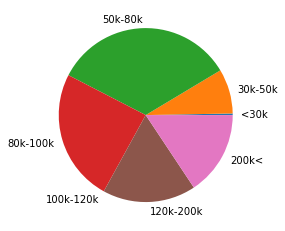

In [45]:
plt.pie(salary_count.values(),labels=['<30k','30k-50k','50k-80k','80k-100k','100k-120k','120k-200k','200k<'])

In [46]:
data.columns

Index(['Agency', 'Posting Type', '# Of Positions', 'Level', 'Career Level',
       'Salary Frequency', 'Salary', 'date1', 'last modified', 'Year', 'qual',
       'category', 'month'],
      dtype='object')

In [47]:
data['qual'].value_counts()

0    4152
1    1235
Name: qual, dtype: int64

In [48]:
salary_count_bachelors={1:0,2:0,3:0,4:0,5:0,6:0,7:0}
salary_count_masters={1:0,2:0,3:0,4:0,5:0,6:0,7:0}
for index, row in data.iterrows():
  if(row['Salary']<30000):
    if(row['qual']):
      salary_count_masters[1]+=1
    else:
      salary_count_bachelors[1]+=1
  elif(row['Salary']<50000 and row['Salary']>=30000):
    if(row['qual']):
      salary_count_masters[2]+=1
    else:
      salary_count_bachelors[2]+=1
  elif(row['Salary']<80000 and row['Salary']>=50000):
    if(row['qual']):
      salary_count_masters[3]+=1
    else:
      salary_count_bachelors[3]+=1
  elif(row['Salary']<100000 and row['Salary']>=80000):
    if(row['qual']):
      salary_count_masters[4]+=1
    else:
      salary_count_bachelors[4]+=1
  elif(row['Salary']<100000 and row['Salary']>=120000):
    if(row['qual']):
      salary_count_masters[5]+=1
    else:
      salary_count_bachelors[5]+=1
  elif(row['Salary']<200000 and row['Salary']>=120000):
    if(row['qual']):
      salary_count_masters[6]+=1
    else:
      salary_count_bachelors[6]+=1
  else:
      if(row['qual']):
        salary_count_masters[7]+=1
      else:
        salary_count_bachelors[7]+=1


print(salary_count_bachelors)
print(salary_count_masters)

{1: 16, 2: 445, 3: 1603, 4: 897, 5: 0, 6: 672, 7: 519}
{1: 0, 2: 2, 3: 219, 4: 427, 5: 0, 6: 262, 7: 325}


In [49]:
list(salary_count_bachelors.values())

[16, 445, 1603, 897, 0, 672, 519]

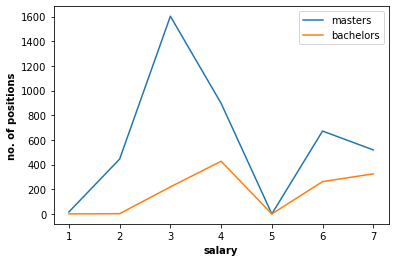

In [50]:
plt.plot(list(salary_count_bachelors.keys()),list(salary_count_bachelors.values()),label='masters')
plt.plot(list(salary_count_masters.keys()),list(salary_count_masters.values()),label='bachelors')

plt.xlabel('salary', fontweight='bold')
plt.ylabel('no. of positions',fontweight='bold')

plt.legend()

trying to predict salary range on the experience level and qualitfication and job type etc

In [51]:
data.columns

Index(['Agency', 'Posting Type', '# Of Positions', 'Level', 'Career Level',
       'Salary Frequency', 'Salary', 'date1', 'last modified', 'Year', 'qual',
       'category', 'month'],
      dtype='object')

In [52]:
data_trim=data[['# Of Positions','Level','Career Level','month','qual','category']]

In [53]:
salary=data['Salary']
salary.head()

Job ID
554053     73806.0
546697     65000.0
565942    109409.0
556917    151810.0
531091    122643.0
Name: Salary, dtype: float64

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_trim,data['Salary'], test_size=0.33, random_state=42)